# The Efficient Frontier - Part II

Let's start by loading the returns and generating the expected returns vector and the covariance matrix

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit_108 as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


As a first exercise, let's assume we have some weights, and let's try and compute the returns and volatility of a portfolio, given a set of weights, returns, and a covariance matrix.

The returns are easy, so let's add this to our toolkit

```python

def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns

```

The volatility is just as easy in matrix form:

```python
def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5
```



In [3]:
l = ["Food", "Beer", "Smoke", "Coal"]

In [4]:
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [5]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [6]:
import pandas as pd
import numpy as np
ew = np.repeat(0.25, 4)
erk.portfolio_return(ew, er[l])

0.19511097196038385

In [7]:
erk.portfolio_vol(ew, cov.loc[l,l])

0.055059195776437045

# The 2-Asset Case

In the case of 2 assets, the problem is somewhat simplified, since the weight of the second asset is 1-the weight of the first asset.

Let's write a function that draws the efficient frontier for a simple 2 asset case.

Start by generating a sequence of weights in a list of tuples. Python makes it easy to generate a list by using something called a _list comprehension_ ... which you can think of as an efficient way to generate a list of values instead of writing a for loop.


In [8]:
import numpy as np

n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]


In [9]:
type(weights)

list

In [10]:
len(weights)

20

In [11]:
weights[0]

array([0., 1.])

In [12]:
weights[4]

array([0.21052632, 0.78947368])

In [13]:
weights[19]

array([1., 0.])

In [14]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

<AxesSubplot:xlabel='V', ylabel='R'>

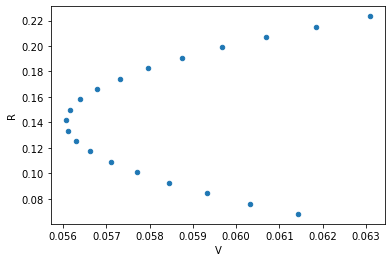

In [15]:
l = ["Games", "Fin"]
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R": rets, "V": vols})
ef.plot.scatter(x="V", y="R")

We can create function that plots the frontier:

```python
def plot_ef2(n_points, er, cov):
    """
    Plots the 2-asset efficient frontier
    """
    if er.shape[0] != 2 or er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2-asset frontiers")
    weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style=".-")
```

A useful summary of the visualization features in pandas is [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)


<AxesSubplot:xlabel='Volatility'>

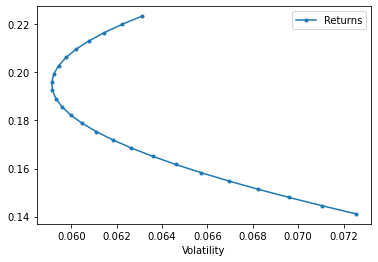

In [16]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l].values, cov.loc[l,l])